## Make Money with Machine Learning 
### Week 4 - Medical Imaging

#### Assignment - perform transfer learning to predict pneumonia in a patient, given their chest x-ray data.

Below is the work of Anjana Tiha linked from the homework ([available here](https://gitlab.com/anjanatiha/Detection-of-Pneumonia-from-Chest-X-Ray-Images))<br/>

First, I want to point out that I'm not going to be doing anything in the medical field.  In college, I heard the story of [a software bug that killed people](https://en.wikipedia.org/wiki/Therac-25).  At that moment, I decided I would work exclusively on software that can not kill anyone.  So, this is not so much my area.  <br/>

Anjana's code is written in a platform specific way for linux/mac.  The first task was to make this run in my environment (Weindows / Conda) which is complete.<br/>
My next task will be to understand why are results are so different (compared below).  


| Derived Report |Anjana |  Mark |
|:-----------|:------------|:------------|
| Precision  |        88.37% |     93.07%    |
| Recall     |     95.48% |    79.23%  |
| F1-Score   |       91.79% |    85.60%  |


She got 30 epochs to run.  Mine terminates after 12.  Need to see what can be done to improve this.<br/>
I also note the following:<br/>
+ We are clumping 2 different kinds of images (viral & bacterial) into one class (pneumonia).  Surely that can't help things.
+ I get quite a few false negatives (declaring normal when it's pneumonia).  If this were to be a real tool, I'd want to avoid that at all costs.  Looks like we might be able to train for recall over precision - need to investigate that.
+ wouldn't it be nice to process out the ribs, heart, spine, etc, and leave just the lungs for analysis?  Seems to me that would help a great deal, for human or machine reviewers.



### Summery
<pre>
Author           : Anjana Tiha
Project Name     : Detection of Pneumonia from Chest X-Ray Images using Convolutional Neural Network, 
                   and Transfer Learning.
Description      : 1. Detected Pneumonia from Chest X-Ray images using Custom Deep Convololutional Neural Network and by                         retraining pretrained model “InceptionV3” with 5856 images of X-ray (1.15GB).
                   2. For retraining removed output layers, freezed first few layers and fine-tuned model for 
                      two new label classes (Pneumonia and Normal).
                   3. With Custom Deep Convololutional Neural Network attained testing accuracy 89.53% and loss 0.41.
Method           : 
Tools/Library    : Python, Keras, PyTorch, TensorFlow
Version History  : 1.0.0.0
Current Version  : 1.0.0.3
Last Update      : 12.16.2018
Comments         : Please use Anaconda editor for convenience of visualization.
</pre>

#### Code
<pre>
GitHub Link      : <a href=https://github.com/anjanatiha/Detection-of-Pneumonia-from-Chest-X-Ray-Images>Detection of Pneumonia from Chest X-Ray Images(GitHub)</a>
GitLab Link      : <a href=https://gitlab.com/anjanatiha/Detection-of-Pneumonia-from-Chest-X-Ray-Images>Detection of Pneumonia from Chest X-Ray Images(GitLab)</a>
Portfolio        : <a href=https://anjanatiha.wixsite.com/website>Anjana Tiha's Portfolio</a>
</pre>

#### Dataset
<pre>
Dataset Name     : Chest X-Ray Images (Pneumonia)
Dataset Link     : <a href=https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia>Chest X-Ray Images (Pneumonia) Dataset (Kaggle)</a>
                 : <a href=https://data.mendeley.com/datasets/rscbjbr9sj/2>Chest X-Ray Images (Pneumonia) Dataset (Original Dataset)</a>
Original Paper   : <a href=https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5>Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning</a>
                   (Daniel S. Kermany, Michael Goldbaum, Wenjia Cai, M. Anthony Lewis, Huimin Xia, Kang Zhang)
                   https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5
</pre>

<!---
#### Library/Tools Version
- Python - v3.6.7
- argparse
- random
- numpy
- shutil
- gc
- re
- Keras - 2.2.4
- Keras-preprocessing - v1.0.5
- TensorFlow - 1.12
- PIL/Pillow - 5.1.0
- Matplotlib - 2.2.2
- scikit-learn - 0.19.1
- mlxtend - 0.14.0
-->

#### Commands / Running Instruction
<pre>
tensorboard --logdir=logs
%config IPCompleter.greedy=True
</pre>

<pre>
<b>Dataset Details</b>
Dataset Name            : Chest X-Ray Images (Pneumonia)
Number of Class         : 2
Number/Size of Images   : Total      : 5856 (1.15 Gigabyte (GB))
                          Training   : 5216 (1.07 Gigabyte (GB))
                          Validation : 320  (42.8 Megabyte (MB))
                          Testing    : 320  (35.4 Megabyte (MB))

<b>Model Parameters</b>
Machine Learning Library: Keras
Base Model              : InceptionV3 && Custom Deep Convolutional Neural Network
Optimizers              : Adam
Loss Function           : categorical_crossentropy

<b>For Custom Deep Convolutional Neural Network : </b>
<b>Training Parameters</b>
Batch Size              : 64
Number of Epochs        : 30
Training Time           : 2 Hours

<b>Output (Prediction/ Recognition / Classification Metrics)</b>
<!--<b>Validation</b>-->
<b>Testing</b>
Accuracy (F-1) Score    : 89.53%
Loss                    : 0.41
Precision               : 88.37%
Recall (Pneumonia)      : 95.48% (For positive class)
<!--Specificity             : -->
</pre>

### Detailed Performance Report
<pre>
Summary
--------------------------
Loss     : 0.41  
Accuracy : 89.53%

Derived Report
--------------------------
Precision     : 88.37%
Recall        : 95.48%
F1-Score      : 91.79%
        
--------------------------------------------------------------------------------
Report for Model File:  2018-12-15 22-32-00/10-val_acc-0.96-val_loss-0.11.hdf5
--------------------------------------------------------------------------------
              precision    recall  f1-score   support
--------------------------------------------------------------------------------
      Normal       0.91      0.79      0.85       121
   Pneumonia       0.88      0.95      0.92       199
--------------------------------------------------------------------------------
   micro avg       0.89      0.89      0.89       320
   macro avg       0.90      0.87      0.88       320
weighted avg       0.90      0.89      0.89       320
</pre>

## Import Libraries

In [1]:
import sys
import os
import argparse

import random

import time
import datetime

from collections import Counter

import numpy as np
import pandas as pd

import shutil
from tqdm import tqdm

import inspect
import gc

import re

from PIL import Image
import cv2

import keras

from keras.utils import np_utils

from keras.preprocessing.image import ImageDataGenerator

from keras import models
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, GlobalAveragePooling1D, GlobalAveragePooling2D, Flatten, BatchNormalization, Dense


from keras.applications.inception_v3 import InceptionV3


from keras.constraints import maxnorm


from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop


from keras import backend as K
K.set_image_dim_ordering('th')


from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

from keras.wrappers.scikit_learn import KerasClassifier


from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf



from IPython.display import display

import seaborn as sns

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.core.debugger import set_trace

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Creates directory, if directory exists removes if remove parameter is set to True 
def create_directory(directory_path, remove=False):
    if remove and os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
            os.mkdir(directory_path)
        except Exception as e:
            print("Could not remove directory : ", directory_path)
            print(e)
            return False
    else:
        try:
            #os.mkdir(directory_path)
            os.makedirs(directory_path, exist_ok=True)

        except Exception as e:
            print("Could not create directory: ", directory_path)
            print(e)
            return False
        
    return True

# Removes directory, if directory exists 
def remove_directory(directory_path):
    if os.path.exists(directory_path):
        try:
            shutil.rmtree(directory_path)
        except Exception as e:
            print("Could not remove directory : ", directory_path)
            print(e)
            return False
        
    return True

def clear_directory(directory_path):
    if os.path.isdir(directory_path):                  #mhs added to avoid error on first run 
        dirs_files = os.listdir(directory_path)

        for item in dirs_files:
    #         item_path = os.path.join(directory_path, item)
            item_path = directory_path+ item

            try:
                if os.path.isfile(item_path):
                    os.unlink(item_path)
                elif os.path.isdir(item_path): 
                    shutil.rmtree(item_path)
            except Exception as e:
                print(e)
            
    return True


def remove_empty_folders(path, removeRoot=True):
    if not os.path.isdir(path):
        return
    
    # remove empty subfolders
    files = os.listdir(path)
    
    if len(files):
        for f in files:
            fullpath = os.path.join(path, f)
            
            if os.path.isdir(fullpath):
                remove_empty_folders(fullpath)

    # if folder empty, delete it
    files = os.listdir(path)
    
    if len(files) == 0 and removeRoot:
        print("Removing empty folder:", path)
        os.rmdir(path)
        
        
def dir_file_count(directory):
    return sum([len(files) for r, d, files in os.walk(directory)])

In [3]:
# print date and time for given type of representation
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()  

In [4]:
# prints a integer for degugging
def debug(x):
    print("-"*40, x, "-"*40)  

In [5]:
# Removes everything except alphabetical and selected characters from name string
def name_correct(name):
    return re.sub(r'[^a-zA-Z,:]', ' ', name).title()

### Data Visualization Function

In [6]:
def get_reset_subplot_params(nrows, ncols, dpi):
    subplot_params = {}
    subplot_params["nrows"] = nrows
    subplot_params["ncols"] = ncols

    subplot_params["figsize_col"] = subplot_params["ncols"]*2.5
    subplot_params["figsize_row"] = subplot_params["nrows"]*2.5
    subplot_params["dpi"] = dpi
    subplot_params["facecolor"] = 'w'
    subplot_params["edgecolor"] = 'k'
    subplot_params["subplot_kw"] = {'xticks': [], 'yticks': []}
    subplot_params["axes.titlesize"] = 'small'
    subplot_params["hspace"] = 0.5
    subplot_params["wspace"] = 0.3
    
    return subplot_params

def get_reset_plot_params(figsize=(15, 5), title="", xlabel ="", ylabel="", legends=[], title_fontsize = 18, label_fontsize = 14, image_file_name="", save = False, dpi=100, update_image=True):
    plot_params = {}
    
    plot_params["figsize"] = figsize
    
    plot_params["title"] = title
    
    plot_params["xlabel"] = xlabel
    plot_params["ylabel"] = ylabel
    
    plot_params["legends"] = legends 
    
    plot_params["title_fontsize"] = title_fontsize
    plot_params["axes.titlesize"] = "small"
    plot_params["label_fontsize"] = label_fontsize
    
    plot_params["image_file_name"] = image_file_name
    plot_params["save"] = save
    plot_params["update_image"] = update_image
    
    plot_params["subplot"] = None
    return plot_params

In [7]:
def select_image_by_category(image_dir, image_count_per_category):
    classes = os.listdir(image_dir)
    class_count = len(classes)

    image_file_paths = {}
    
    for i in range(class_count):
        #subdir_path = image_dir+"/"+classes[i]
        subdir_path = os.path.join( image_dir, classes[i])
        subdir_files = os.listdir(subdir_path)

        subdir_file_count = len(subdir_files)

        subdir_file_mem = {}
        
        subdir_file_index = -1
        
        image_file_paths[classes[i]] = []
        
        for j in range(image_count_per_category):
            while subdir_file_index in subdir_file_mem:
                subdir_file_index = random.randint(0, subdir_file_count-1)
                
            subdir_file_mem[subdir_file_index] = 1
            
            subdir_file_name = subdir_files[subdir_file_index]
           # subdir_file_path = subdir_path+ "/" + subdir_file_name
            subdir_file_path = os.path.join(subdir_path, subdir_file_name)

            image_file_paths[classes[i]].append(subdir_file_path)
            
    return image_file_paths


def get_fig_axs(subplot_params):
    fig, axs = plt.subplots(
        nrows=subplot_params["nrows"], ncols=subplot_params["ncols"], 
        figsize=(subplot_params["figsize_col"], subplot_params["figsize_row"]),
        dpi=subplot_params["dpi"], facecolor=subplot_params["facecolor"], 
        edgecolor=subplot_params["edgecolor"], subplot_kw=subplot_params["subplot_kw"])
        
    return fig, axs
    

def plot_sample_image(image_file_paths, plot_params, subplot_params, update_image=True):

    fig, axs = get_fig_axs(subplot_params)

    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])


    i=0
    for img_filepath in image_file_paths:
        img = cv2.imread(img_filepath, 1)
        
        #move this above - does it fix label misalignment?... yes it does
        plt.subplot(subplot_params["nrows"], subplot_params["ncols"], i+1)
        
        #plt.title(img_filepath.split("/")[-1])       #not cross platform
        #plt.title(img_filepath.split(os.sep)[-1])    #cross platform, close to the original implementation

        #plt.title(os.path.split(img_filepath)[-1])   #cross platform, using system path tools
        plt_title = os.path.split(img_filepath)[-1]
        #print( "plt title: \""+ plt_title+"\"")
        plt.title(plt_title)
        
        
        #plt.subplot(subplot_params["nrows"], subplot_params["ncols"], i+1) #move this up
        
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        
        i=i+1
        
    if plot_params["update_image"] and os.path.exists(plot_params["image_file_name"]):
        os.remove(plot_params["image_file_name"])  
    if plot_params["save"]:
        fig.savefig(plot_params["image_file_name"], dpi=plot_params["dpi"])
        
    plt.tight_layout()
    plt.show()
    
    
def show_class_sample_images(directory, image_count_per_category=5, save=False, dpi=100, update_image=False):
    class_count = len(os.listdir(directory))
    print("Number of Class: ", class_count)
    sample_img_by_class = select_image_by_category(directory, image_count_per_category)
    for class_name in sample_img_by_class:
        plot_params = get_reset_plot_params(image_file_name="img.png", save = save, dpi=dpi, update_image=update_image)
        subplot_params = get_reset_subplot_params(nrows=1, ncols=image_count_per_category, dpi=dpi)
        print("%s%s%s"%("-"*55, name_correct(class_name), "-"*55))
        plot_sample_image(sample_img_by_class[class_name], plot_params, subplot_params)
        print("")
    print("%s%s%d%s"%("-"*55, "All Class Printed:", class_count, "-"*55))

In [8]:
# count number of files in each subdirectory of a directory
def subdirectory_file_count(master_directory):
    subdirectories = os.listdir(master_directory)
    subdirectory_count = len(subdirectories)

    subdirectory_names = []
    subdirectory_file_counts = []

    for subdirectory in subdirectories:
        current_directory = os.path.join(master_directory, subdirectory)
        file_count = len(os.listdir(current_directory))
        subdirectory_names.append(subdirectory)
        subdirectory_file_counts.append(file_count)
    
    return subdirectory_names, subdirectory_file_counts
         
    

# show barplot
def bar_plot(x, y, plot_property):
    if plot_property['subplot']:
        plt.subplot(plot_property['subplot'])
    sns.barplot(x=x, y=y)
    plt.title(plot_property['title'], fontsize=plot_property['title_fontsize'])
    plt.xlabel(plot_property['xlabel'], fontsize=plot_property['label_fontsize'])
    plt.ylabel(plot_property['ylabel'], fontsize=plot_property['label_fontsize'])
    plt.xticks(range(len(x)), x)
    
# show bar plot for count of labels in subdirectory of a directory
def count_bar_plot(master_directory, plot_property):
    dir_name, dir_file_count = subdirectory_file_count(master_directory)
    x = [name_correct(i) for i in dir_name]
    # x = dir_name
    y = dir_file_count
    bar_plot(x, y, plot_property)
    
    
# show bar plot for count of labels in subdirectory of a training, validation, testing directory    
def show_train_val_test(training_dir, validation_dir, testing_dir, plot_property):
    plt.figure(figsize=plot_property['figsize'])
    
    title = plot_property['title']
    plot_property['title'] = title + " (Training)"
    subplot_no = plot_property['subplot'] 

    count_bar_plot(training_dir, plot_property)
    
    
    plot_property['title'] = title + " (Validation)"
    plot_property['subplot'] = subplot_no+1
    count_bar_plot(validation_dir, plot_property)
    
    
    plot_property['title'] = title + " (Testing)"
    plot_property['subplot'] = subplot_no + 2
    count_bar_plot(testing_dir, plot_property)
    
    plt.show()

In [9]:
# reset tensorflow graph tp free up memory and resource allocation 
def reset_graph(model=None):
    if model:
        try:
            del model
        except:
            return False
    
    tf.reset_default_graph()
    
    K.clear_session()
    
    gc.collect()
    
    return True


# reset callbacks 
def reset_callbacks(checkpoint=None, reduce_lr=None, early_stopping=None, tensorboard=None):
    checkpoint = None
    reduce_lr = None
    early_stopping = None
    tensorboard = None
    

### Preprocessing

In [10]:
reset_graph()
reset_callbacks()

W0921 11:53:01.839126 29408 deprecation_wrapper.py:119] From C:\Users\mhsco\Anaconda3\envs\week-4\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0921 11:53:01.841096 29408 deprecation_wrapper.py:119] From C:\Users\mhsco\Anaconda3\envs\week-4\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0921 11:53:01.853089 29408 deprecation_wrapper.py:119] From C:\Users\mhsco\Anaconda3\envs\week-4\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [11]:
# Configure input/ output directory
# Configure training, validation, testing directory

#import os
print( os.getcwd() )

print( sys.version )

#input_directory = r"./data/input/"
#output_directory = r"./data/output/"
#input_directory = os.path.join(os.getcwd(), "data", "input")
#output_directory = os.path.join(os.getcwd(), "data", "output")
input_directory = os.path.join("data", "input")
output_directory = os.path.join("data", "output")

#training_dir = input_directory + r"train"
#validation_dir = input_directory + r"val"
#testing_dir = input_directory + r"test"
training_dir = os.path.join(input_directory, "train" )
validation_dir = os.path.join(input_directory, "val")
testing_dir = os.path.join(input_directory,"test" )

#figure_directory = "data/output/figures"
#figure_directory = ".\\data\\output\\figures"
figure_directory = os.path.join(output_directory, "figures")
print( figure_directory )

if not os.path.exists(figure_directory):
    os.makedirs(figure_directory, exist_ok=True)
    
    
#file_name_pred_batch = figure_directory+r"/result"
#file_name_pred_sample = figure_directory+r"/sample"
file_name_pred_batch = os.path.join(figure_directory, "result")
file_name_pred_sample = os.path.join(figure_directory, "sample")

C:\Users\mhsco\Machine-Learning-with-Siraj\Week-4\linkedProject\code
3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
data\output\figures


Number of Class:  2
-------------------------------------------------------Normal-------------------------------------------------------


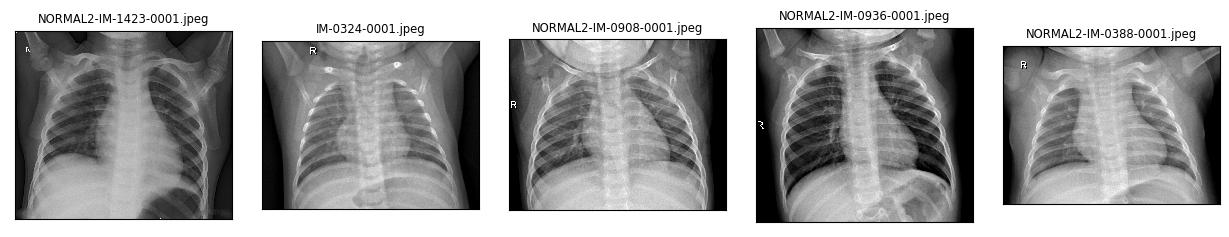


-------------------------------------------------------Pneumonia-------------------------------------------------------


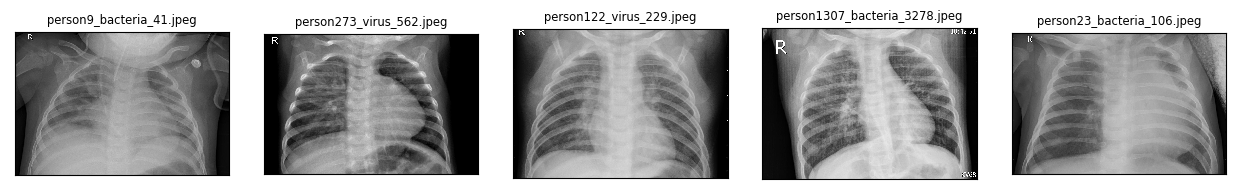


-------------------------------------------------------All Class Printed:2-------------------------------------------------------


In [12]:
show_class_sample_images(training_dir, image_count_per_category=5, save=False, dpi=100, update_image=False)

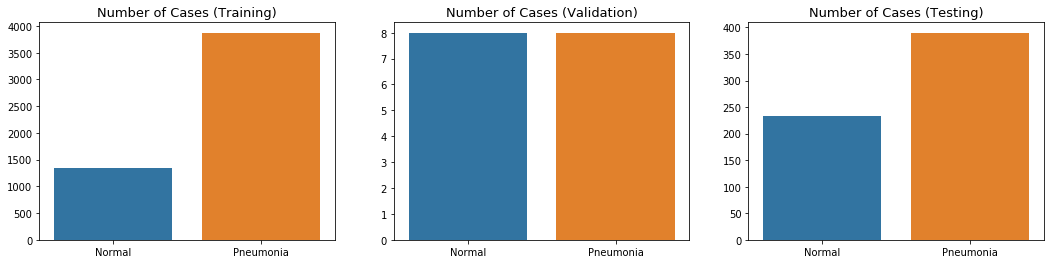

In [13]:
plot_params = get_reset_plot_params()

plot_params['figsize'] = (18,4)

plot_params['title_fontsize'] = 13
plot_params['label_fontsize'] = 10

plot_params['title'] = "Number of Cases"

plot_params['subplot'] = 131

show_train_val_test(training_dir, validation_dir, testing_dir, plot_params)
classes = os.listdir(training_dir)
classes = [name_correct(i) for i in classes]



### Image Preprocessing/ Augmentation/ Transformation for Training, Validation, Testing and  Dataset 

In [14]:
# batch_size = 32

# target_size = (299, 299)
# color_mode = "rgb"


rescale = 1./255
target_size = (150, 150)
batch_size = 163
class_mode = "categorical"
# class_mode = "binary"


train_datagen = ImageDataGenerator(
    rescale=rescale,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=batch_size,
    shuffle=True)


validation_datagen = ImageDataGenerator(rescale=rescale)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=dir_file_count(validation_dir),
    shuffle = False)


test_datagen = ImageDataGenerator(rescale=rescale)

test_generator = test_datagen.flow_from_directory(
    testing_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=dir_file_count(testing_dir),
    shuffle = False)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [15]:
from sklearn.utils import class_weight
def get_weight(y):
    class_weight_current =  class_weight.compute_class_weight('balanced', np.unique(y), y)
    return class_weight_current

###  Training Files Configuration

In [16]:
class_weight = get_weight(train_generator.classes)
class_weight

array([1.9448173 , 0.67303226])

In [17]:
#main_model_dir = output_directory + r"models/"
main_model_dir = os.path.join(output_directory, "models")
#main_log_dir = output_directory + r"logs/"
main_log_dir = os.path.join(output_directory, "logs")


clear_directory(main_log_dir)
remove_empty_folders(main_model_dir, False)


#model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
#log_dir = main_log_dir + time.strftime('%Y-%m-%d %H-%M-%S')
model_dir_name = time.strftime('%Y-%m-%d_%H-%M-%S')
log_dir_name = time.strftime('%Y-%m-%d_%H-%M-%S')
model_dir = os.path.join( main_model_dir, model_dir_name)
log_dir = os.path.join( main_log_dir, log_dir_name)

create_directory(model_dir, remove=True)
create_directory(log_dir, remove=True)

#model_file = model_dir + "{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"
model_file = model_dir + os.path.sep + "{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.hdf5"

### Callbacks 

In [18]:
reset_graph()
reset_callbacks()

In [19]:
print("Settting Callbacks at ", date_time(1))

checkpoint = ModelCheckpoint(
    model_file, 
    monitor='val_acc', 
    save_best_only=True)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True)


tensorboard = TensorBoard(
    log_dir=log_dir,
    batch_size=batch_size,
    update_freq = 'batch')


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=5,
    cooldown=2,
    min_lr=0.0000000001,
    verbose=1)


#-----------------------------------------------------------------------------------------------------------------#
callbacks = [checkpoint, reduce_lr, early_stopping, tensorboard]
# callbacks = [checkpoint, tensorboard]
#-----------------------------------------------------------------------------------------------------------------#
print("Set Callbacks at ", date_time(1))

Settting Callbacks at  Timestamp: 2019-09-21 11:53:03
Set Callbacks at  Timestamp: 2019-09-21 11:53:04


In [20]:
def get_conv_model():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(3,150,150)))
    model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(3,150,150)))
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2 , activation='softmax'))


    print(model.summary())
    
    return model

In [21]:
# Load and configure model InceptionV3 for fine-tuning with new class labels
def get_model():    
    
#     base_model = InceptionV3(weights=None, include_top=False)
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

    x = base_model.output
    
#     x = Dropout(0.5)(x)
    
#     x = GlobalAveragePooling2D()(x)
    
#     x = Dense(512, activation='relu')(x)
#     # x = Dense(1024, activation='relu')(x)
    
    x = BatchNormalization()(x)
    
# #     predictions = Dense(2, activation='sigmoid')(x) 
    predictions = Dense(2, activation='softmax')(x) 
    
    
    model = Model(inputs=base_model.input, outputs=predictions)
    
    
    for layer in base_model.layers:
        layer.trainable = False
        
        
#     for layer in model.layers[:249]:
#         layer.trainable = False
#     for layer in model.layers[249:]:
#         layer.trainable = True
        
    
    model.summary()
        
    return model

### Training/Fine-Tuning Base Model-InceptionV3 for Fine-Tuning with New Class Labels

In [22]:
print("Getting Base Model", date_time(1))
# model = get_model()
model = get_conv_model()
# model = keras.models.load_model("data/output/models/2018-12-15 00-26-45/13-val_acc-0.70-val_loss-0.58.hdf5")

Getting Base Model Timestamp: 2019-09-21 11:53:04


W0921 11:53:04.272807 29408 deprecation_wrapper.py:119] From C:\Users\mhsco\Anaconda3\envs\week-4\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0921 11:53:04.275800 29408 deprecation_wrapper.py:119] From C:\Users\mhsco\Anaconda3\envs\week-4\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0921 11:53:05.233813 29408 deprecation_wrapper.py:119] From C:\Users\mhsco\Anaconda3\envs\week-4\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0921 11:53:05.361470 29408 deprecation.py:506] From C:\Users\mhsco\Anaconda3\envs\week-4\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 150, 150)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 150, 150)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 75, 75)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 75, 75)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 75, 75)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 37, 37)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 37, 37)        18496     
__________

In [23]:
print("Starting Trainning Model", date_time(1))


steps_per_epoch=len(train_generator)
validation_steps=len(validation_generator)



# lr = 0.00001
# optimizer=optimizers.Adam(lr=lr)



optimizer=optimizers.Adam()
loss='categorical_crossentropy'
metrics=['accuracy']
epochs = 100




model.compile(optimizer, loss=loss, metrics=metrics)

history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs=epochs,
    verbose=2,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=validation_steps, 
    class_weight=class_weight)

print("Completed Model Trainning", date_time(1))


Starting Trainning Model Timestamp: 2019-09-21 11:53:05


W0921 11:53:05.439672 29408 deprecation_wrapper.py:119] From C:\Users\mhsco\Anaconda3\envs\week-4\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0921 11:53:05.522434 29408 deprecation.py:323] From C:\Users\mhsco\Anaconda3\envs\week-4\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0921 11:53:06.415521 29408 deprecation_wrapper.py:119] From C:\Users\mhsco\Anaconda3\envs\week-4\lib\site-packages\keras\callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0921 11:53:06.416518 29408 deprecation_wrapper.py:119] From C:\Users\mhsco\Anaconda3\envs\week-4\lib\site-packages\keras\callbacks.py:853: The name tf.su

Epoch 1/100
 - 61s - loss: 0.6029 - acc: 0.7366 - val_loss: 0.7445 - val_acc: 0.5000
Epoch 2/100
 - 60s - loss: 0.5750 - acc: 0.7429 - val_loss: 0.7578 - val_acc: 0.5000
Epoch 3/100
 - 61s - loss: 0.5276 - acc: 0.7535 - val_loss: 0.7035 - val_acc: 0.6250
Epoch 4/100
 - 61s - loss: 0.3612 - acc: 0.8395 - val_loss: 0.7038 - val_acc: 0.6875
Epoch 5/100
 - 61s - loss: 0.2411 - acc: 0.8965 - val_loss: 0.6937 - val_acc: 0.7500
Epoch 6/100
 - 61s - loss: 0.2147 - acc: 0.9118 - val_loss: 0.7966 - val_acc: 0.6250
Epoch 7/100
 - 61s - loss: 0.1888 - acc: 0.9271 - val_loss: 0.5187 - val_acc: 0.7500
Epoch 8/100
 - 61s - loss: 0.1688 - acc: 0.9344 - val_loss: 0.8606 - val_acc: 0.6250
Epoch 9/100
 - 61s - loss: 0.1569 - acc: 0.9362 - val_loss: 0.6194 - val_acc: 0.6250
Epoch 10/100
 - 61s - loss: 0.1397 - acc: 0.9452 - val_loss: 1.0640 - val_acc: 0.6250
Epoch 11/100
 - 61s - loss: 0.1402 - acc: 0.9496 - val_loss: 0.6457 - val_acc: 0.6875
Epoch 12/100
 - 61s - loss: 0.1347 - acc: 0.9511 - val_loss: 0.

### Model Performance Visualization over the Epochs

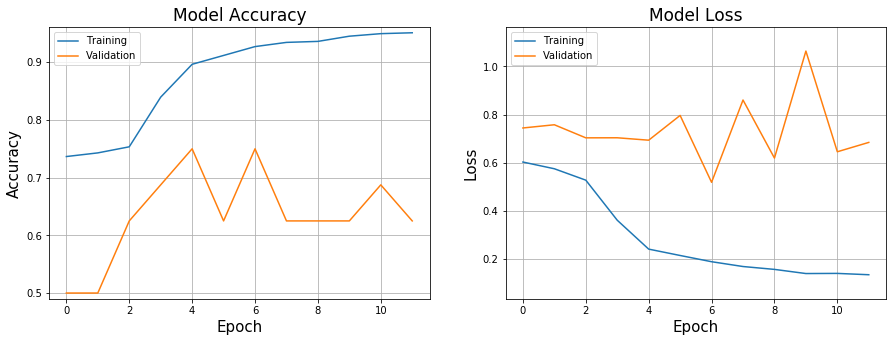

In [24]:
xlabel = 'Epoch'
legends = ['Training', 'Validation']

ylim_pad = [0.01, 0.1]


plt.figure(figsize=(15, 5))

# Plot training & validation Accuracy values

y1 = history.history['acc']
y2 = history.history['val_acc']

min_y = min(min(y1), min(y2))-ylim_pad[0]
max_y = max(max(y1), max(y2))+ylim_pad[0]


plt.subplot(121)

plt.plot(y1)
plt.plot(y2)

plt.title('Model Accuracy', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()

                         
# Plot training & validation loss values
    
y1 = history.history['loss']
y2 = history.history['val_loss']

min_y = min(min(y1), min(y2))-ylim_pad[1]
max_y = max(max(y1), max(y2))+ylim_pad[1]
    
    
plt.subplot(122)

plt.plot(y1)
plt.plot(y2)

plt.title('Model Loss', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()
                         
plt.show()

### Test Saved Models

In [25]:
#dir_name = r"data/output/models/"
dir_name = main_model_dir
print(dir_name)
dirs = os.listdir(dir_name)
for i in range(len(dirs)):
    print(i, dirs[i])

data\output\models
0 2019-09-21_00-49-28
1 2019-09-21_01-08-30
2 2019-09-21_01-19-32
3 2019-09-21_02-32-57
4 2019-09-21_11-10-00
5 2019-09-21_11-19-27
6 2019-09-21_11-53-03


In [26]:
#cur_dir =dir_name+dirs[0]+"/"
cur_dir = os.path.join( dir_name, dirs[0])
print(cur_dir)
model_names = os.listdir(cur_dir)
print(model_names)
for i in range(len(model_names)):
    print(i, model_names[i])

data\output\models\2019-09-21_00-49-28
['01-val_acc-0.50-val_loss-0.88.hdf5', '03-val_acc-0.62-val_loss-0.61.hdf5', '04-val_acc-0.75-val_loss-0.59.hdf5']
0 01-val_acc-0.50-val_loss-0.88.hdf5
1 03-val_acc-0.62-val_loss-0.61.hdf5
2 04-val_acc-0.75-val_loss-0.59.hdf5


In [27]:
#model_file = cur_dir+model_names[5]
model_file = os.path.join(cur_dir, model_names[-1])

print(model_file)

data\output\models\2019-09-21_00-49-28\04-val_acc-0.75-val_loss-0.59.hdf5


In [28]:
model = keras.models.load_model(model_file)

In [29]:
print("results")
result  = model.evaluate_generator(test_generator, steps=len(test_generator), verbose=1)

print("%s%.2f  "% ("Loss     : ", result[0]))
print("%s%.2f%s"% ("Accuracy : ", result[1]*100, "%"))

results
1/1 [==============================] - 7s 7s/step
Loss     : 0.35  
Accuracy : 83.33%


In [30]:
print("results")
y_pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)  
y_pred = y_pred.argmax(axis=-1)
y_true=test_generator.classes

results
1/1 [==============================] - 6s 6s/step


------------------------------------------------------------------------------------------
Derived Report
------------------------------------------------------------------------------------------
Precision     : 93.07%
Recall        : 79.23%
F1-Score      : 85.60%
------------------------------------------------------------------------------------------





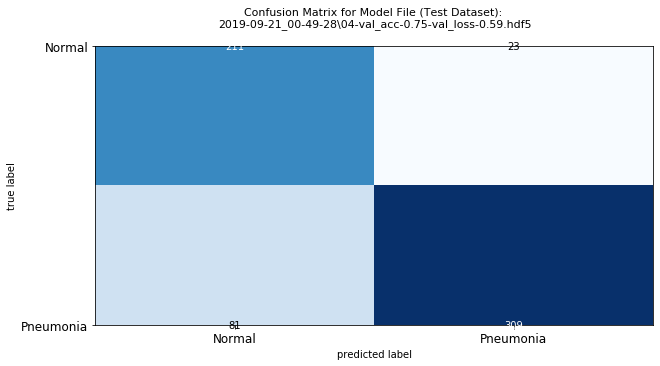




------------------------------------------------------------------------------------------
Report for Model File:  2019-09-21_00-49-28\04-val_acc-0.75-val_loss-0.59.hdf5
------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

      Normal       0.72      0.90      0.80       234
   Pneumonia       0.93      0.79      0.86       390

    accuracy                           0.83       624
   macro avg       0.83      0.85      0.83       624
weighted avg       0.85      0.83      0.84       624

------------------------------------------------------------------------------------------


In [31]:
#image_file_name_CM = figure_directory+"/CM"
image_file_name_CM = os.path.join(figure_directory, "CM")

#title = model_file.split("/")
title = model_file.split(os.path.sep)
#model_title = "/".join([i for i in title[3:]])
model_title = (os.path.sep).join([i for i in title[3:]])

precision = precision_score(y_true, y_pred) 
recall = recall_score(y_true, y_pred) 
f1 = f1_score(y_true, y_pred) 

print("-"*90)
print("Derived Report")
print("-"*90)
print("%s%.2f%s"% ("Precision     : ", precision*100, "%"))
print("%s%.2f%s"% ("Recall        : ", recall*100,    "%"))
print("%s%.2f%s"% ("F1-Score      : ", f1*100,        "%"))
print("-"*90)
print("\n\n")

CM = confusion_matrix(y_true, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(10,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(len(classes)), classes, fontsize=12)
plt.yticks(range(len(classes)), classes, fontsize=12)
plt.title("Confusion Matrix for Model File (Test Dataset): \n"+model_title, fontsize=11)
fig.savefig(image_file_name_CM, dpi=100)
plt.show()
    

cls_report_print = classification_report(y_true, y_pred, target_names=classes)

cls_report = classification_report(y_true, y_pred, target_names=classes, output_dict=True)

print("\n\n")
print("-"*90)
print("Report for Model File: ", model_title)
print("-"*90)
print(cls_report_print)
print("-"*90)

In [32]:
numofbatch = len(test_generator)

batch_no = random.randint(0, numofbatch-1)

y_img_batch, y_true_batch = test_generator[batch_no] 
y_true_batch = y_true_batch.argmax(axis=-1)

y_pred_batch = model.predict(y_img_batch)
y_pred_batch = y_pred_batch.argmax(axis=-1)


sizeofbatch = len(y_true_batch)
print("-"*35)
print("%s%d"%     ("Selected Batch No       : ", batch_no))
print("-"*35)
print("%s%d"%     ("Batch Size              : ", len(y_pred_batch)))
print("-"*35)
print("%s%.2f%s"% ("Accuracy                : ", np.mean(y_true==y_pred)*100, "%"))
print("-"*35)

-----------------------------------
Selected Batch No       : 0
-----------------------------------
Batch Size              : 624
-----------------------------------
Accuracy                : 83.33%
-----------------------------------


### Visualization

In [33]:
def show_predictions(y_img_batch, y_true, y_pred, subplot_params, plot_params, class_map, testing_dir, image_file_name, count=8, sample=True):
    fig, axs = get_fig_axs(subplot_params)
    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])
    
    file_names = test_generator.filenames
    m = {}
    length = len(y_true)
    for i in range(0, count): 
        num = i
        if sample:
            num = random.randint(0, length-1)
            while num in m:
                num = int(random.randint(0, length-1))

            m[num]=1


        plt.subplot(subplot_params["nrows"], subplot_params["ncols"], i+1)
        img = cv2.imread(testing_dir+"\\"+ file_names[num], 1)
        plt.imshow(img)

        plt.xticks([])
        plt.yticks([])
        
        
        original = class_map[y_true[num]]
        predicted = class_map[y_pred[num]]
        
        
        title_text = ("%s%s%s%s%s"%("True: ", original, "\n", "Pred: ", predicted))
        
        if original==predicted:
            plt.title(title_text)
        else:
            plt.title(title_text, color='red')
            

        if plot_params["update_image"] and os.path.exists(image_file_name):
            os.remove(image_file_name)   

        fig.savefig(image_file_name, dpi=subplot_params["dpi"])

    plt.tight_layout()
    plt.show()



### Visualization

In [34]:
#image_file_name_batch = figure_directory+"/result"
image_file_name_batch = os.path.join(figure_directory, "result")
#image_file_name_sample = figure_directory+"/sample"
image_file_name_sample = os.path.join(figure_directory, "sample")

batch_size_t = len(y_true_batch)

class_map = {v: k for k, v in test_generator.class_indices.items()}


dpi=100


ncols = 8
# ncols = batch_size_t if batch_size_t<ncols else ncols     
# nrows = batch_size_t/ncols
# nrows = int(batch_size_t/ncols)+1 if batch_size_t%ncols else  int(batch_size_t/ncols)
nrows = 4

count = ncols*nrows


subplot_params = get_reset_subplot_params(nrows, ncols, dpi)
plot_params = get_reset_plot_params()


#### Visualization 1 (Random Batch)
Visualization of performance of a random test dataset batch

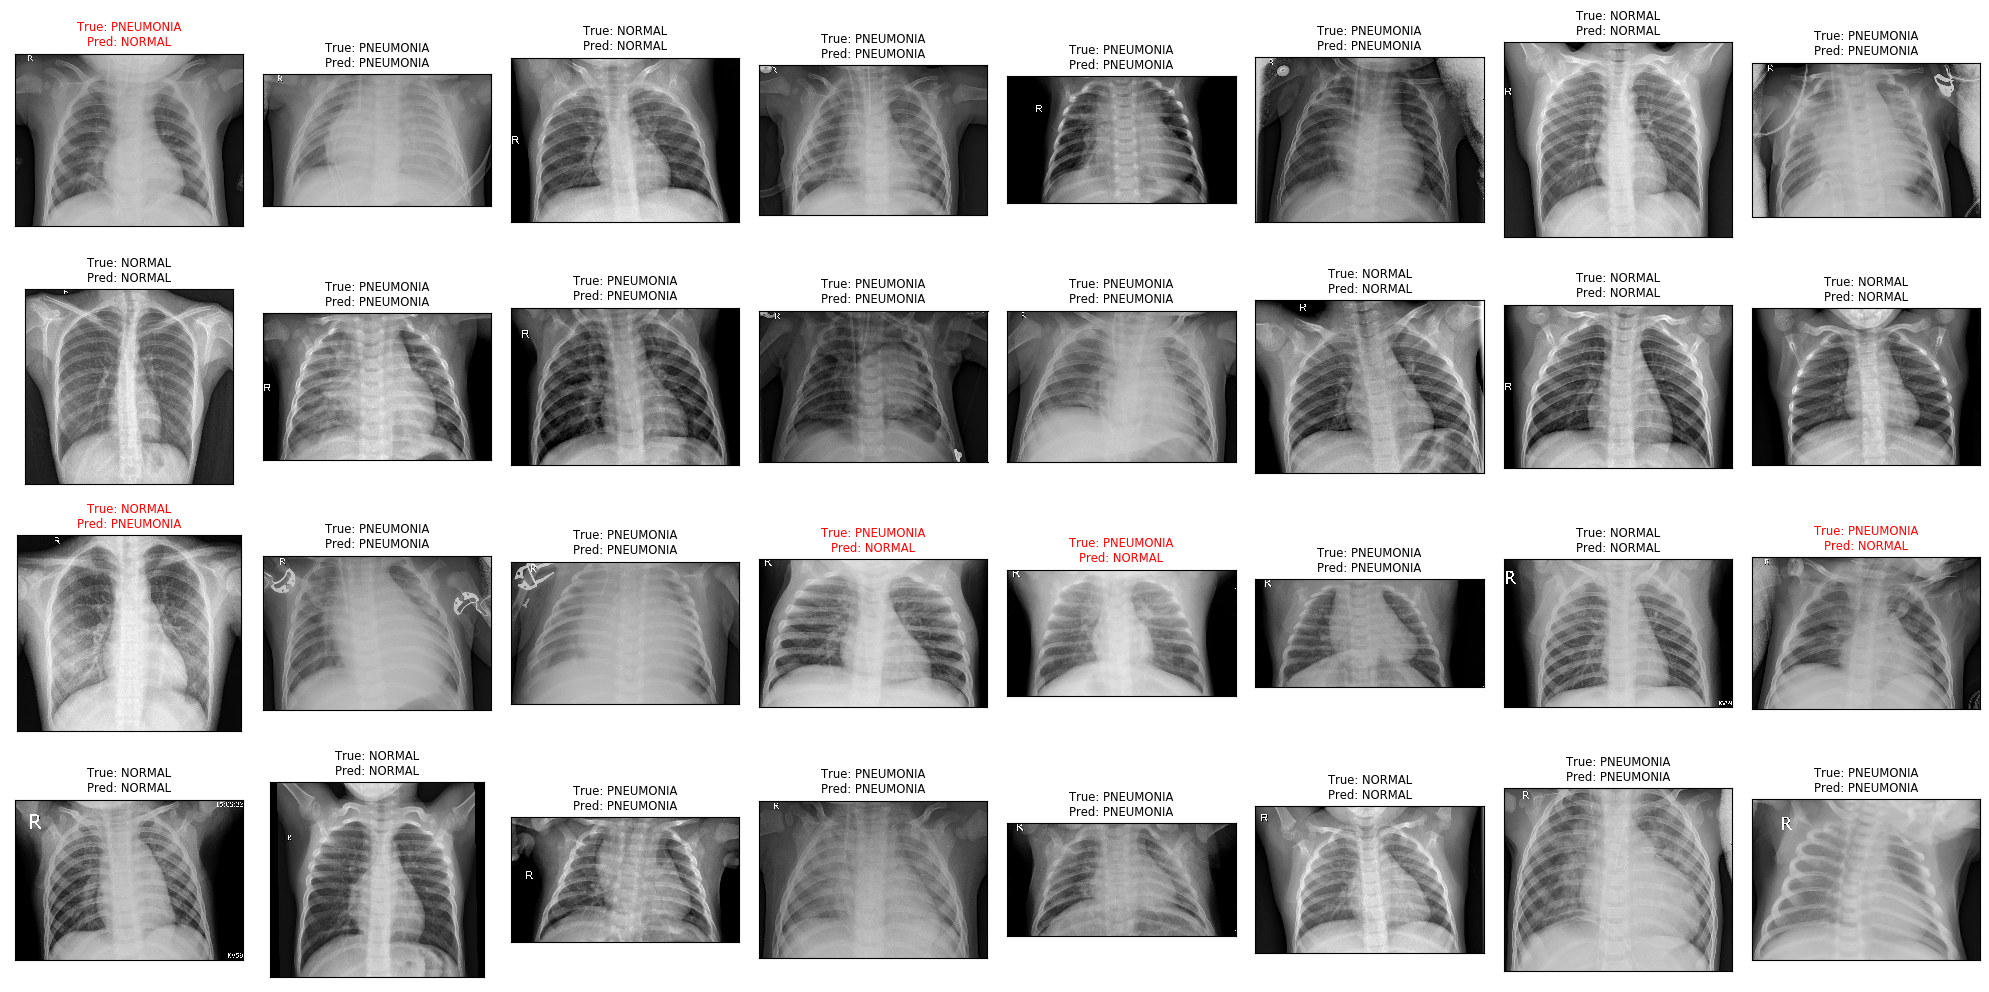

In [35]:
show_predictions(y_img_batch, y_true_batch, y_pred_batch, subplot_params, plot_params, class_map, testing_dir, image_file_name_batch, count=count, sample=True)

#### Visualization 2 (Random) 
Visualization of performance of a few random images from a random batch

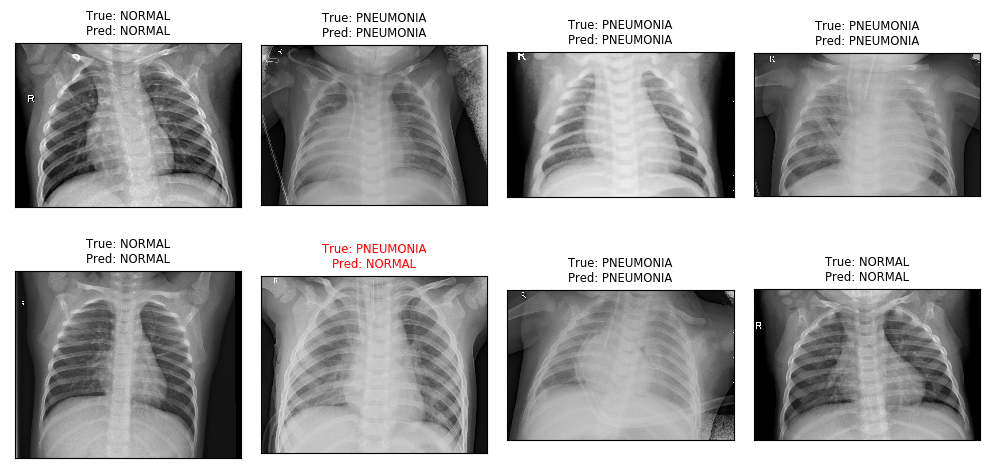

In [36]:
ncols = 4
nrows = 2


#if batch_size_t<4:
#    cols = 1
#    
#count = cols*rows
count = ncols*nrows
    

subplot_params = get_reset_subplot_params(nrows, ncols, dpi)
plot_params = get_reset_plot_params()


show_predictions(y_img_batch, y_true_batch, y_pred_batch, subplot_params, plot_params, class_map, testing_dir, image_file_name_sample, count=count, sample=True)